## Importing libraries

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from scipy.stats import norm
import numpy as np
from scipy.stats import pareto
from scipy.stats import norm

## Drawing from a normal distribution to indicate accuracy of variance estimates

### First for a standard normal distribution

In [103]:
max_n = 5 * 10 ** 3
sample_sizes = np.linspace(10, max_n, 100, dtype=int)
num_lines = 5
rows = list()

for sample_size in sample_sizes:
    # making the samples is the only part unique to experimenting with a normal distribution
    samples = norm.rvs(0, 1, size = (sample_size, num_lines))
    avg_samples = samples.mean(axis = 0)
    avg_errors = (samples - avg_samples)
    sqrd_errors = avg_errors ** 2
    variance = sqrd_errors.sum(axis = 0) / (sample_size - 1)

    rows.append(variance)

variances = np.stack(rows)

Text(0.5, 1.0, 'Convergentie van samples voor een standaard normale verdeling.')

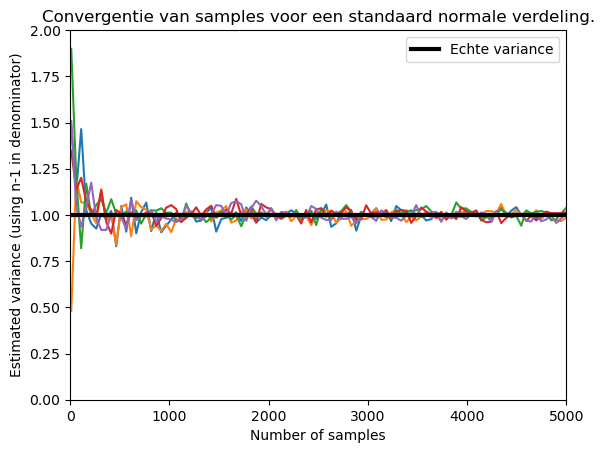

In [105]:
fig, ax = plt.subplots()

ax.plot(sample_sizes, variances)
ax.axhline(1, color = 'k', lw = 3, label = "Echte variance")

ax.set_ylim([0, 2])
ax.set_xlim([0, max_n])
ax.set_xlabel("Number of samples")
ax.set_ylabel("Estimated variance (using n-1 in denominator)")
ax.legend()
ax.set_title("Convergentie van samples voor een standaard normale verdeling.")

### Now for a heavy tailed distribution

**Note:** Below code is mostly copy/pasted from above; could be collected in 1 or multiple functions to reduce repetetive coding!

In [78]:
max_n = 5 * 10 ** 6
sample_sizes = np.linspace(10, max_n, 100, dtype=int)
num_lines = 5
b = 2.8392
rows = list()

for sample_size in sample_sizes:
    samples = pareto.rvs(b, size = (sample_size, num_lines))
    avg_samples = samples.mean(axis = 0)
    avg_errors = (samples - avg_samples)
    sqrd_errors = avg_errors ** 2
    variance = sqrd_errors.sum(axis = 0) / (sample_size - 1)

    rows.append(variance)

variances = np.stack(rows)

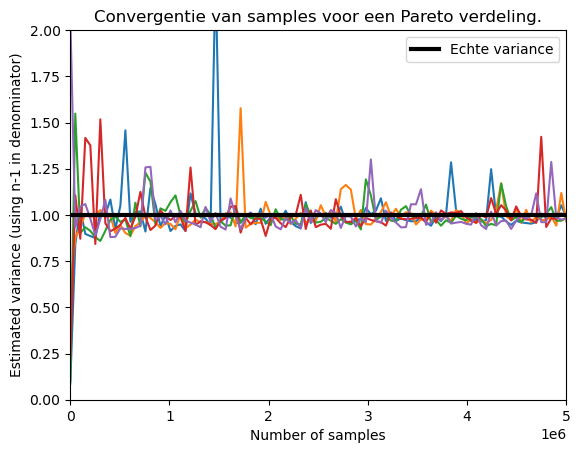

In [79]:

fig, ax = plt.subplots()

ax.plot(sample_sizes, variances)
ax.axhline(1, color = 'k', lw = 3, label = "Echte variance")

ax.set_ylim([0, 2])
ax.set_xlim([0, max_n])
ax.set_xlabel("Number of samples")
ax.set_ylabel("Estimated variance (using n-1 in denominator)")
ax.legend()
ax.set_title("Convergentie van samples voor een Pareto verdeling.")
mean, var, skew, kurt = pareto.stats(b, moments='mvsk')

## Accuracy $n-1$ vs $n$ in de noemer

In [170]:
def compute_variability(randgen_fun, samples_per_run, num_runs, power = 2):

    samples = randgen_fun((samples_per_run, num_runs))
    avg_samples = samples.mean(axis = 0)
    avg_errors = np.abs(samples - avg_samples)
    sqrd_errors = avg_errors ** power
    variance = sqrd_errors.sum(axis = 0)
    return variance

In [159]:
randnormal = lambda size : norm.rvs(0, 1, size = size)
b = 2.8392
randpareto = lambda size : pareto.rvs(b, size = size)
num_runs = 5 * 10 ** 4

rows_norm = list()
rows_pareto = list()
for samples_per_run in np.arange(2, 100, 2):
    dof = samples_per_run - 1

    # Sample and compute variances for the normal distribution
    variance = compute_variability(randnormal, samples_per_run, num_runs)
    variances_dof_norm = variance / dof
    variances_raw_norm = variance / samples_per_run

    rows_norm.append({'number of samples' : samples_per_run,
                    'denominator n-1' : variances_dof_norm.mean(),
                    'denominator n' : variances_raw_norm.mean()})
    
    # Sample and compute variances for the Pareto distribution
    variance = compute_variability(randpareto, samples_per_run, num_runs)
    variances_dof_par = variance / dof
    variances_raw_par = variance / samples_per_run

    rows_pareto.append({'number of samples' : samples_per_run,
                    'denominator n-1' : variances_dof_par.mean(),
                    'denominator n' : variances_raw_par.mean()})

df_variance_test_normal = pd.DataFrame(rows_norm).set_index('number of samples')
df_variance_test_pareto = pd.DataFrame(rows_pareto).set_index('number of samples')

#### Create convergence plot for normal distribution

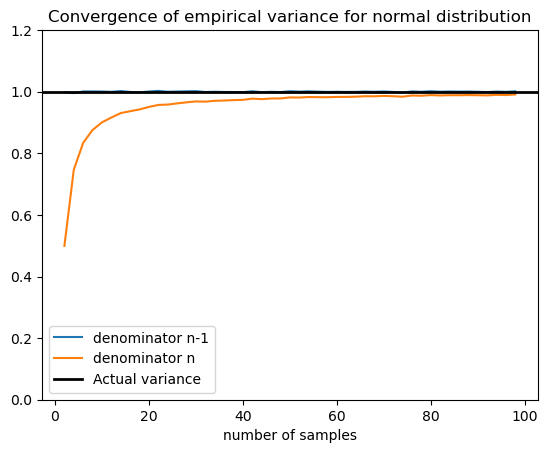

In [160]:
fig, ax = plt.subplots()
df_variance_test_normal.plot(ax = ax)
ax.axhline(1, color = 'k', lw = 2, label = 'Actual variance')
ax.set_ylim([0,1.2])
ax.set_title("Convergence of empirical variance for normal distribution")
ax.legend()

#### Create convergence plot for Pareto distribution

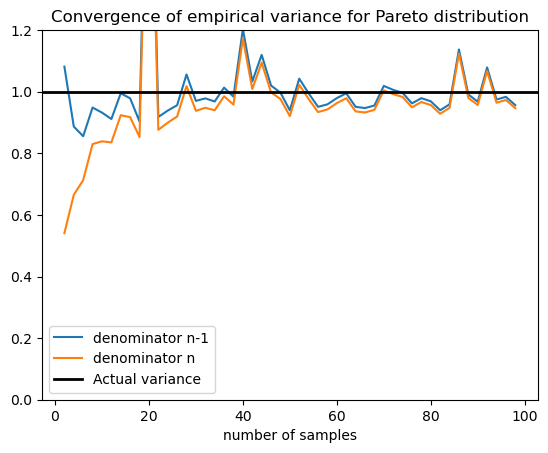

In [161]:
fig, ax = plt.subplots()
df_variance_test_pareto.plot(ax = ax)
ax.axhline(1, color = 'k', lw = 2, label = 'Actual variance')
ax.set_ylim([0,1.2])
ax.set_title("Convergence of empirical variance for Pareto distribution")
ax.legend()

## Generalize above abalysis to arbitrary $L_p$ norm.

In [188]:
randnormal = lambda size : norm.rvs(0, 1, size = size)
b = 2.8392
randpareto = lambda size : pareto.rvs(b, size = size)
num_runs = 5 * 10 ** 4

rows_norm = list()
rows_pareto = list()
for samples_per_run in np.arange(3, 100, 2):
    # Sample and compute variances for the normal distribution
    variances = compute_variability(randnormal, samples_per_run, num_runs, power = 3)
    variance = variances.mean()

    rows_norm.append({'number of samples' : samples_per_run,
                    'denominator n-2' : variance / (samples_per_run - 2),
                    'denominator n-1' : variance / (samples_per_run - 1),
                    'denominator n' : variance / samples_per_run})
    
    # Sample and compute variances for the Pareto distribution
    variances = compute_variability(randpareto, samples_per_run, num_runs, power = 3)
    variance = variances.mean()

    rows_pareto.append({'number of samples' : samples_per_run,
                'denominator n-2' : variance / (samples_per_run - 2),
                'denominator n-1' : variance / (samples_per_run - 1),
                'denominator n' : variance / samples_per_run})

df_variance_test_normal = pd.DataFrame(rows_norm).set_index('number of samples')
df_variance_test_pareto = pd.DataFrame(rows_pareto).set_index('number of samples')

### Convergence for Normal

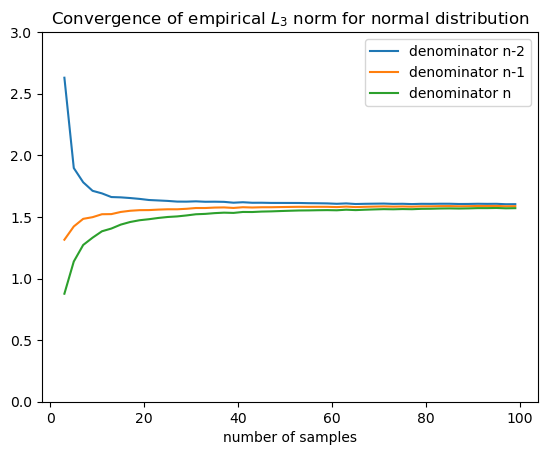

In [196]:
fig, ax = plt.subplots()
df_variance_test_normal.plot(ax = ax)
ax.set_ylim([0,3])
ax.set_title("Convergence of empirical $L_3$ norm for normal distribution")
ax.legend()

### Convergence for Pareto

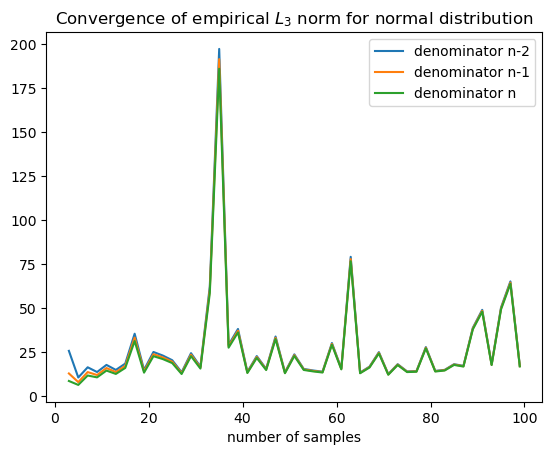

In [198]:
fig, ax = plt.subplots()
df_variance_test_pareto.plot(ax = ax)
ax.set_title("Convergence of empirical $L_3$ norm for normal distribution")
ax.legend()